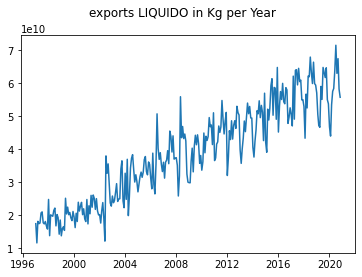

<Figure size 432x288 with 0 Axes>

In [30]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
filename = "./data/EXP_COMPLETA.zip"
chunksize = 10 ** 6

def process(chunk):
  df = chunk
  df['Date'] = pd.to_datetime(df.CO_ANO.astype(str) + '/' + df.CO_MES.astype(str) + '/01')
  res = df.groupby(['Date']).agg('sum').reset_index()[['Date', 'KG_LIQUIDO']]
  return res
frames = []
with pd.read_csv(filename, sep=";" ,chunksize=chunksize, squeeze=True) as reader:
    for chunk in reader:
        frames.append(process(chunk))
df = pd.concat(frames).groupby(['Date']).agg('sum').reset_index()
plt.suptitle('exports LIQUIDO in Kg per Year')
plt.plot(df.Date, df.KG_LIQUIDO)
plt.figure()
plt.show()